In [168]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [169]:
data = pd.read_csv('project2.data')

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [171]:
# removing duplicated
print(data.duplicated().sum())
data = data.drop_duplicates()


14


In [172]:
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [173]:
data.shape

(272, 10)

In [174]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [175]:
print("Unique Values:")
for key in data.keys():
    print(f"  {key}:\t\t{len(data[key].unique())}, {data[key].unique()}")


Unique Values:
  class:		2, ['no-recurrence-events' 'recurrence-events']
  age:		6, ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
  menopause:		3, ['premeno' 'ge40' 'lt40']
  tumor-size:		11, ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
  inv-nodes:		7, ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
  node-caps:		3, ['no' 'yes' '?']
  deg-malig:		3, [3 2 1]
  breast:		2, ['left' 'right']
  breast-quad:		6, ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
  irradiat:		2, ['no' 'yes']


In [176]:
# dealing with '?' in the data
nodecap_yes = data['node-caps'] == 'yes'
data['node-caps'] = nodecap_yes

irradiat_bool = data['irradiat'] == 'yes'
data['irradiat'] = irradiat_bool

data.loc[data['breast-quad'] == '?',['breast-quad']] = data['breast-quad'].unique()[0]

In [177]:
# dealing with categorical data (one-hot encoding)
category_keys = ['class', 'menopause', 'breast', 'breast-quad']
for key in category_keys:
    data[key] = data[key].astype("category")
    data = pd.get_dummies(data, columns=[key], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      272 non-null    object
 1   tumor-size               272 non-null    object
 2   inv-nodes                272 non-null    object
 3   node-caps                272 non-null    bool  
 4   deg-malig                272 non-null    int64 
 5   irradiat                 272 non-null    bool  
 6   class_recurrence-events  272 non-null    bool  
 7   menopause_lt40           272 non-null    bool  
 8   menopause_premeno        272 non-null    bool  
 9   breast_right             272 non-null    bool  
 10  breast-quad_left_low     272 non-null    bool  
 11  breast-quad_left_up      272 non-null    bool  
 12  breast-quad_right_low    272 non-null    bool  
 13  breast-quad_right_up     272 non-null    bool  
dtypes: bool(10), int64(1), object(3)
memory usage: 

In [178]:
# dealing with data ranges
range_keys = ['age', 'tumor-size', 'inv-nodes']

for key in range_keys:
    values = []
    local_data = data[key]
    for val in local_data:
        values.append(sum([int(i) for i in val.split('-') if i.isdigit()]) / 2.0)
    data[key] = values
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      272 non-null    float64
 1   tumor-size               272 non-null    float64
 2   inv-nodes                272 non-null    float64
 3   node-caps                272 non-null    bool   
 4   deg-malig                272 non-null    int64  
 5   irradiat                 272 non-null    bool   
 6   class_recurrence-events  272 non-null    bool   
 7   menopause_lt40           272 non-null    bool   
 8   menopause_premeno        272 non-null    bool   
 9   breast_right             272 non-null    bool   
 10  breast-quad_left_low     272 non-null    bool   
 11  breast-quad_left_up      272 non-null    bool   
 12  breast-quad_right_low    272 non-null    bool   
 13  breast-quad_right_up     272 non-null    bool   
dtypes: bool(10), float64(3), int64(

<Axes: ylabel='age'>

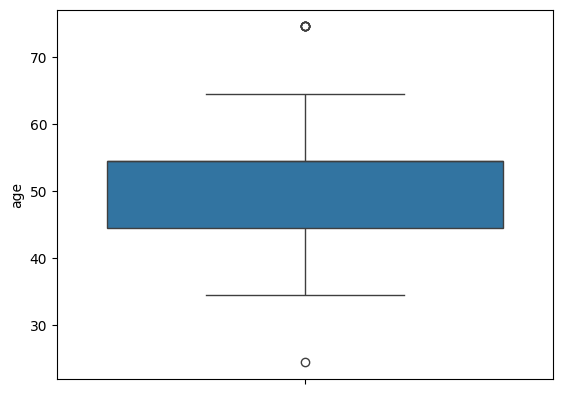

In [179]:
sns.boxplot(data['age'])

<Axes: ylabel='tumor-size'>

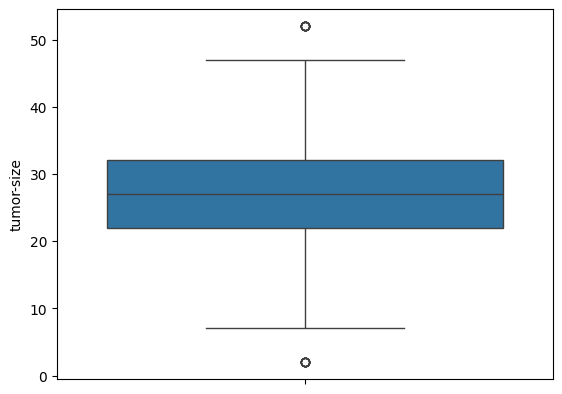

In [180]:
sns.boxplot(data['tumor-size'])


<Axes: ylabel='inv-nodes'>

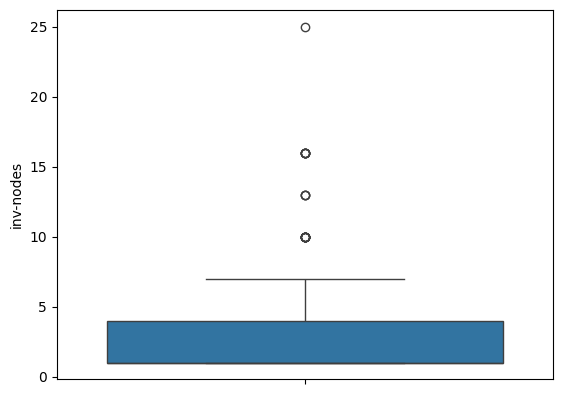

In [181]:
sns.boxplot(data['inv-nodes'])


<Axes: ylabel='deg-malig'>

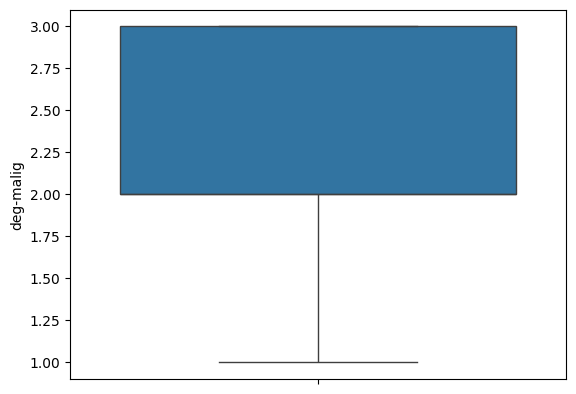

In [182]:
sns.boxplot(data['deg-malig'])
